# Satellite Image Analysis GGS416 - Week4

In this tutorial we are going to visualize a satellite image using the `pyplot` function from `matplotlib`.

It is important you should be able to visualize an image:
- In a piece of GIS software via a Graphical User Interface (GUI), such as in ESRI ArcMap or preferably an open-source alternative such as QGIS.
- Using a script-based approach via visualization packages such as `matplotlib`

To begin, we need to import one of our satellite images via `rasterio`, as follows:

In [11]:
import rasterio

# Let's get the PlanetScope image we downloaded previously from Planet.
# It consists of a single 4 band (blue, green, red, NIR).
# For the sake of efficiency, here we will use the clipped geoTIFF created previously
image_filename = "../week3/20190321_174348_0f1a_3B_AnalyticMS.tif"
my_image = rasterio.open(image_filename)
my_image

<open DatasetReader name='../week3/20190321_174348_0f1a_3B_AnalyticMS.tif' mode='r'>

You should be familiar with this `rasterio` object type now. 

This means we can use the `rasterio` object to read the different blue, green, red and near-infrared layers from this PlanetScope layer.

In [12]:
blue = my_image.read(1)
green = my_image.read(2)
red = my_image.read(3)
nir = my_image.read(4)
blue

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [13]:
# We will need to install matplotlib into our virtual environment
import sys
!conda install --yes --prefix {sys.prefix} matplotlib
from matplotlib import pyplot

Solving environment: ...working... done

# All requested packages already installed.



## Single layer plots

We can now use the `pyplot` command `.imshow()` (which stands for image show) to create a figure object using our blue layer. 

Finally, we can show the plot using the `.show()` command.

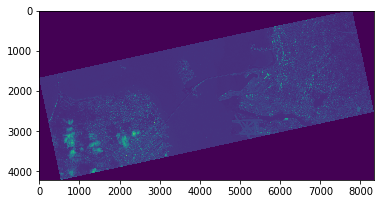

In [14]:
# Use imshow to load the blue band.
fig = pyplot.imshow(blue)

# Display the results.
pyplot.show()

We also play around with how we visualize different color patterns in our imagery. 

For example, next we will plot using the green band and then setting a custom color bar.

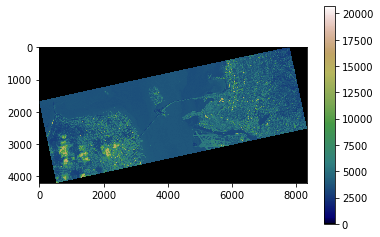

In [15]:
fig = pyplot.imshow(green) #create the figure
fig.set_cmap('gist_earth') #set the color map, hence `set_cmap()`
pyplot.colorbar() #add the colorbar to our plot
pyplot.show() #display our image

The color maps available come in a vast range of color tones and sequences. 

For example, as follows we will use the 'inferno' color map, which is a great option for distinguishing two contrasting 

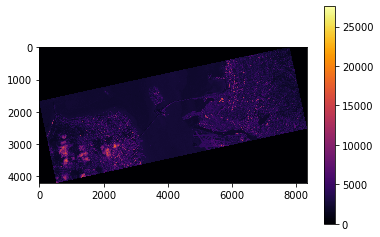

In [16]:
fig = pyplot.imshow(red) #create the figure
fig.set_cmap('inferno') #set the color map, hence `set_cmap()`
pyplot.colorbar() #add the colorbar to our plot
pyplot.show() #display our image

Finally, we can look at how we put these different layers together to generate composite images.

## Multilayer composite imagery

If we want to plot multiple layers at once, we will need to stack the different bands we want to combine.

For a standard image, we will want to use red, green and blue. 

We will need to scale these bands for display purposes, and we can use `numpy` to help stack them together.

In [17]:
import numpy as np

def scale(band): # scale values for display purposes
    return band / 10000.0

blue = scale(my_image.read(1))
green = scale(my_image.read(2))
red = scale(my_image.read(3))
nir = scale(my_image.read(4))

rgb = np.dstack((red, green, blue))
rgb

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

Now we can plot our truecolor image using the red, green, blue composite: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


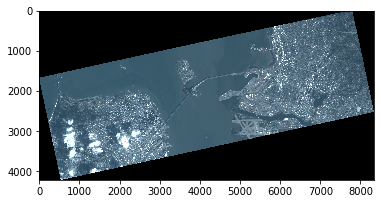

In [18]:
pyplot.imshow(rgb)

Instead of using red, green blue, we can also combine other bands together as we desire.

In the following example, we're going to integrate the near-infrared band along with red and green. 

This false-color composite image will highlight the vegetation areas in our image more easily. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


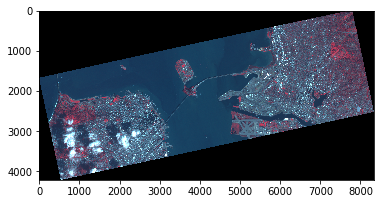

In [19]:
nrg = np.dstack((nir, red, green))
pyplot.imshow(nrg)